<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/Hypeparametro_gridsearchcv_modelo_clasificacion_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

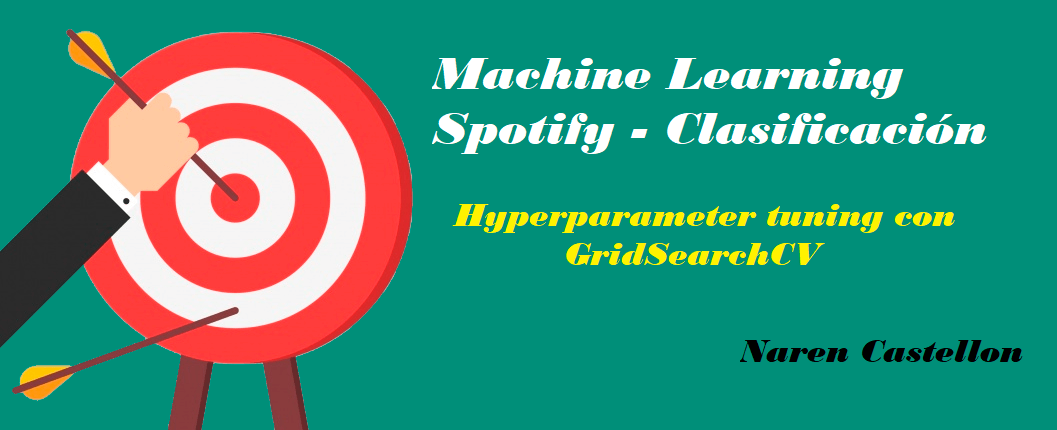

In [3]:
#@title **Cancelación de Reserva**
from IPython.display import Image
Image("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/imagen/Spotify-Hyperparametro.png")


# Spotify - Clasificación de popularidad
### Datos de todos los tiempos de la década de 2000

TABLA DE CONTENIDOS

0. INTRODUCCIÓN Y OBJETIVO DEL PROYECTO
1. IMPORTACIÓN DE BIBLIOTECAS
2. DESCRIPCIÓN Y LIMPIEZA DE DATOS
3. ANÁLISIS EXPLORATORIO Y VISUALIZACIONES
4. DATOS DEL MODELO
5. CONCLUSIONES FINALES

### 0 INTRODUCCIÓN


#### Contexto

- Este conjunto de datos contiene estadísticas de audio de aproximadamente las 2000 mejores pistas entre 1956 y 2019 en Spotify. Los datos contienen 15 columnas, cada una de las cuales describe la pista y sus cualidades.

#### Agradecimientos

Estos datos se extraen de la lista de reproducción de Spotify - Top 2000s en PlaylistMachinery(@plamere) usando Selenium con Python. Más específicamente, se extrajo de http://sortyourmusic.playlistmachinery.com/.

#### Información de los Datos

1. Index: ID
2. Title: Name of the Track
3. Artist: Name of the Artist
4. Top Genre: Genre of the track
5. Year: Release Year of the track
6. Beats per Minute(BPM): The tempo of the song
7. Energy: The energy of a song - the higher the value, the more energtic. song
8. Danceability: The higher the value, the easier it is to dance to this song.
9. Loudness: The higher the value, the louder the song.
10. Valence: The higher the value, the more positive mood for the song.
11. Length: The duration of the song.
12. Acoustic: The higher the value the more acoustic the song is.
13. Speechiness: The higher the value the more spoken words the song contains
15. Popularity: The higher the value the more popular the song is.

# OBJETIVO E INTERESES DEL PROYECTO:

1. El objetivo es construir modelos de clasificación
- Buscará clasificar el nivel de popularidad de una canción en función de las métricas de características dadas como se mencionó anteriormente.

En el camino veremos otros intereses como:

2. ¿Géneros y artistas más populares de todos los tiempos desde 1950 hasta 2000?
3. ¿Hay una tendencia en los géneros preferidos en el pasado vs ahora?
4. ¿Qué otras variables tienen un impacto en la métrica de popularidad?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 Importando librerias

In [3]:
import pandas as pd
import numpy as np
from scipy import stats, special

import seaborn as sns
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode

from sklearn.naive_bayes import GaussianNB, MultinomialNB

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2 Descripción de los Datos y Limpiezaa

#### 2.1 DATOS DESCRIPCIÓN

In [5]:
# Loading datadataset & View

spotify_df = pd.read_csv("/content/drive/MyDrive/Curso de ML 3 version/Sesión N° 03/Spotify-2000.csv")
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [6]:
spotify_df.sample(frac=0.9)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1018,1019,Tom Traubert's Blues (Four Sheets To The Wind ...,Tom Waits,folk,1976,135,28,30,-13,17,33,399,80,3,52
1040,1041,She's Always a Woman,Billy Joel,album rock,1977,177,32,29,-12,12,38,201,80,3,72
1901,1902,Lucy In The Sky With Diamonds - Remastered 2009,The Beatles,british invasion,1967,65,33,31,-9,14,67,208,5,3,69
567,568,Une belle histoire,Michel Fugain,chanson,2014,83,58,27,-9,37,65,198,50,4,40
971,972,Landslide,Fleetwood Mac,album rock,1975,159,16,41,-22,12,42,199,88,3,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,Always On My Mind,Elvis Presley,adult standards,1973,181,39,36,-14,12,50,218,75,3,61
1115,1116,The Rose,Bette Midler,adult standards,1979,134,23,35,-10,38,18,221,90,3,67
522,523,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
1722,1723,Karma Police,Radiohead,alternative rock,1997,75,51,36,-9,17,32,264,6,3,74


In [6]:
# Descripción general de la información del conjunto de datos y los tipos de datos
spotify_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [7]:
# Descripción general de los datos numéricos del conjunto de datos

spotify_df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [8]:
# Número de géneros que han aparecido en el top 2000 de todos los tiempos.

len(spotify_df["Top Genre"].unique())

149

In [9]:
# Número de veces que cada género aparece en el top 2000 de todos los tiempos.

spotify_df["Top Genre"].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

### Resumen del conjunto de datos sin procesar:

#### El conjunto de datos contiene:
- 1994 entradas
- 1994 entradas no nulas
- 15 columnas variables totales
- 149 entradas de género

#### Tipos de datos:
- 4 columnas categóricas
- 11 columnas numéricas

#### Datos numéricos:
- El conjunto de datos es entre los años 1994 y 2019. Solo alrededor de 63 años de las canciones más populares clasificadas por spotify.
- La popularidad mínima de una canción es 11 y la máxima es 100.

### Análisis inicial y progresión:

1. Está claro que la música rock parece ser el género favorito de todos los tiempos con más características. Pero dicho esto, los datos están inclinados hacia antes de la década de 2000 y el gusto musical tiende a cambiar a lo largo de los años, por lo que esto puede investigarse más a fondo en la EDA.


### 2.2 Limpieza de datos

#### Acción:

1. Convierta tipos de datos de columna.
2. Elimina las columnas innecesarias.
3. Ajuste los títulos de las columnas.
4. Consolidar la columna de género ya que hay muchas variaciones de un solo género, p. 'pop holandés' y 'dance pop' o 'álbum rock' y rock alternativo. haremos que estas columnas simplemente 'pop' o simplemente 'rock' para proporcionar una representación resumida más precisa de esos géneros.

In [7]:
# Conversión de longitud (duración) a un tipo de datos entero

spotify_df.replace(',','', regex=True, inplace=True)
spotify_df['Length (Duration)']= spotify_df['Length (Duration)'].apply(pd.to_numeric,errors='coerce')
print('Length (Duration) ahora es un -->',spotify_df['Length (Duration)'].dtype, 'data type')

Length (Duration) ahora es un --> int64 data type


In [8]:
# Eliminando the Index column.
spotify_df.drop(columns = ['Index'], inplace = True)

# Conversión de todos los títulos de las columnas a minúsculas.
spotify_df.columns = map(str.lower, spotify_df.columns)

# Conversión de nombres de columna para que no tengan espacio entre ellos, si lo tienen, reemplace el espacio con un guión bajo "_"
spotify_df.rename(columns = {'top genre' : 'genre', 'beats per minute (bpm)':'beats_per_minute','loudness (db)': 'loudness','length (duration)': 'duration'}, inplace = True)

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1994 non-null   object
 1   artist            1994 non-null   object
 2   genre             1994 non-null   object
 3   year              1994 non-null   int64 
 4   beats_per_minute  1994 non-null   int64 
 5   energy            1994 non-null   int64 
 6   danceability      1994 non-null   int64 
 7   loudness          1994 non-null   int64 
 8   liveness          1994 non-null   int64 
 9   valence           1994 non-null   int64 
 10  duration          1994 non-null   int64 
 11  acousticness      1994 non-null   int64 
 12  speechiness       1994 non-null   int64 
 13  popularity        1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 218.2+ KB


In [ ]:
spotify_df.head(3)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


### Columna de consolidación de género

In [9]:
# función para dividir la columna de género
    
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

# bucle hasta que el género no se puede dividir más

new_genre = spotify_df['genre'].copy()
while(max((new_genre.str.split(" ", 1)).str.len()) > 1):
    new_genre = genre_splitter(new_genre)
    
print('Nuevo Total de Géneros de 146 a -->', len(new_genre.unique()))

Nuevo Total de Géneros de 146 a --> 68


In [10]:
new_genre.value_counts()

rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
laboratorio      1
holler           1
hardcore         1
trance           1
bebop            1
Name: genre, Length: 68, dtype: int64

### Análisis:
- Arriba se muestra una columna de género consolidada en géneros individuales/más generalistas en rock, pop, etc.
- También se espera un aumento en los valores debido a la consolidación de los géneros.

In [11]:
# ingresando nuevos valores de columna de new_genre a gender en dataframe.

spotify_df['genre'] = new_genre
spotify_df['genre']

0       standards
1            rock
2             hop
3           metal
4            rock
          ...    
1989    standards
1990    standards
1991         rock
1992        bebop
1993    standards
Name: genre, Length: 1994, dtype: object

# 3 ANÁLISIS EXPLORATORIO Y VISUALIZACIONES


- En esta sección investigaremos los datos. Echando un vistazo particular a nuestras características objetivo: "Popularidad" y "Género" y sus variables correlacionadas dentro del conjunto de datos.

### 3.1 ¿Géneros y artistas más populares de 1950 a 2000?

In [12]:
# Crea una función top_10, que toma un solo parámetro para una columna.
# Agrupe los datos por la entrada de columna deseada, sume los valores de las columnas restantes, ordene los valores de suma por la columna 'Popularidad'
# de mayor a menor, imprime las 10 filas superiores.

def top_10(column):
    top_10_songs = spotify_df.groupby([column]).sum().sort_values('popularity', ascending=False).head(10)
    return(top_10_songs[['popularity']])  # Only show 'popularity' column.

top_10('genre')

,popularity
genre,
rock,52025
pop,19390
standards,7697
metal,6141
soul,3032
indie,2912
wave,2571
invasion,2451
cabaret,2349


In [16]:
# Usa la misma función para los Artistas
top_10('artist')

,popularity
artist,
The Beatles,2451
Queen,2085
Coldplay,1888
Michael Jackson,1511
The Rolling Stones,1496
U2,1476
Bruce Springsteen,1378
David Bowie,1311
ABBA,1186


#### 3.1 Conclusión:

- Lo anterior muestra la acumulación de los géneros y artistas más populares de todos los tiempos. También podemos ver que hay una cantidad significativa de entradas de géneros de música Rock en comparación con el resto de los géneros. Por lo tanto, siempre hubo una gran posibilidad de que este sea el más popular en general. Aunque Michael Jackson, sería un caso atípico aquí debido a su popularidad.

- Pero en términos de popularidad 'pura' como se ve a continuación, valores de 0 a 100, la historia es un poco diferente. Podemos ver que la música pop y sus muchas variaciones tienen una popularidad mayoritaria en los años más recientes. Esto puede indicar un cambio en la popularidad a lo largo de los años, así como tendencias de escucha musical debido a los avances tecnológicos.

In [13]:
pure_popularity = spotify_df.sort_values('popularity', ascending=False).head(10)
pure_popularity[['genre', 'year', 'popularity']]

,genre,year,popularity
793,pop,2019,100
787,pop,2019,98
786,electropop,2019,95
1641,pop,1994,95
688,rock,2017,88
726,pop,2018,88
683,pop,2017,87
687,pop,2017,87
745,pop,2018,87
529,mellow,2013,86


## 3.2 ¿Hay una tendencia/cambio en los géneros preferidos antes de la década de 2000 frente a los actuales a lo largo de los años?

#### - Para abordar esto, **dividiré el conjunto de datos en cuartos (n/4) y realizaré un seguimiento del cambio de popularidad** en el género, así como el recuento de entradas de género a lo largo de los años.

In [14]:
# Dividir los datos de la columna 'Año' en 4 cubos igualmente dispersos en orden ascendente desde 1956 hasta 2019:

spotify_df['year'] = pd.qcut(spotify_df['year'], q=4, labels=[1, 2, 3, 4]) 
spotify_df['year'].value_counts()

1    520
3    500
4    496
2    478
Name: year, dtype: int64

[Text(0, 0.5, 'Year Count'), Text(0.5, 0, 'Year Block (YB) divided into 4/4')]

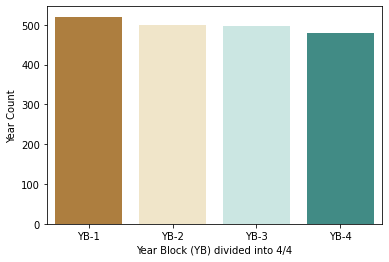

In [15]:
x=['YB-1', 'YB-2', 'YB-3', 'YB-4']
y=spotify_df['year'].value_counts()

_ = sns.barplot(x=x, y=y, palette="BrBG")
_.set(xlabel='Year Block (YB) divided into 4/4', ylabel='Year Count')

In [16]:
# Función para crear conjuntos de bloques de año (1 - 4):

def year_block(year_no):
    block = spotify_df.loc[spotify_df['year'] == year_no]
    return block[['genre', 'year', 'popularity']].sort_values('popularity', ascending=False)

# Función para crear recuentos de valores de los 5 géneros principales para el gráfico circular visual:

def genre_count(year_block):
    return year_block['genre'].value_counts().head()

## Visuales de gráfico circular de bloques de año que muestran tendencia/cambio en géneros entre (1956 - 2019)

In [17]:
# Creación del bloque de año 1 y contador de género para gráfico circular visual:
year_block_1 = year_block(1) 
genre_count(year_block_1)
   
# Gráfico circular para el bloque de año 1:
values = genre_count(year_block_1).values
names = genre_count(year_block_1).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Año  1')
fig.show()
   
    
# Creación del bloque de año 2 y contador de género para gráfico circular visual:
year_block_2 = year_block(2) 
genre_count(year_block_2)
   
# Gráfico circular para el bloque de año 2:
values = genre_count(year_block_2).values
names = genre_count(year_block_2).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Año 2')
fig.show()


# Creation of Year block 3 & Genre counter for Pie Chart Viaual:
year_block_3 = year_block(3) 
genre_count(year_block_3)
   
# Gráfico circular para el bloque de año 3:
values = genre_count(year_block_3).values
names = genre_count(year_block_3).index
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, name="Year Block 3", pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Año 3')
fig.show()


# Creación del bloque de año 4 y contador de género para gráfico circular visual:
year_block_4 = year_block(4) 
genre_count(year_block_4)
   
# Gráfico circular para el bloque de año 4:
values = genre_count(year_block_4).values
names = genre_count(year_block_4).index
colors = ['mediumturquoise','gold', 'darkorange', 'lightgreen', 'AntiqueWhite']

fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0.1, 0, 0, 0, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text='Año 4')
fig.show()

#### 3.2 Conclusión: análisis de gráfico circular:
- Según lo anterior, podemos ver claramente un cambio en la preferencia de género, desde el Rock inclinándose hacia la música pop al final del cuarto 4/4. Pero, el nivel de popularidad de la música pop tiene una tasa mucho más alta que la de la música rock en su apogeo, como veremos a continuación.

## Recuento de popularidad del género a lo largo de los años

In [18]:
# Uniéndose a las cabezas de year_block para el conteo de género superior:

frames = [year_block_1.head(), year_block_2.head(), year_block_3.head(), year_block_4.head()]
top_genre_df = pd.concat(frames)
top_genre_df

,genre,year,popularity
1113,rock,1,83
943,rock,1,82
999,rock,1,82
884,rock,1,82
1947,invasion,1,82
1237,rock,2,84
1204,rock,2,84
1157,rock,2,83
1452,punk,2,83
1315,rock,2,83


## 3.3 ¿Qué otras características tienen un impacto en la popularidad de una canción?

- Buscaremos explorar variables numéricas como las funciones de audio y buscaremos la correlación entre cada función para ayudar a definir las funciones utilizables para construir un modelo preciso. Primero, eliminemos las columnas 'título' y 'año' ya que todos los valores son únicos y no ayudarán con nuestro modelo de clasificación.

In [19]:
spotify_df.drop(columns = ['title','year'], inplace = True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### Nota:
- Los géneros musicales que tienen valores únicos harían que nuestro modelo fuera ineficiente, ya que no tiene suficientes datos con los que trabajar, por lo que se eliminarán estos valores y las filas correspondientes en el marco de datos original. Por lo tanto:

#### - Se eliminarán los géneros con un valor de recuento inferior a 20x

In [20]:
unique = spotify_df['genre'].unique()
to_remove = [] 

# los géneros que tienen una sola instancia solo se colocarán dentro de la matriz to_remove
for genre in unique:
    if spotify_df['genre'].value_counts()[genre] < 20: 
        to_remove += [genre]

print('Género Valores que se eliminarán del conjunto de datos =', len(to_remove))

Género Valores que se eliminarán del conjunto de datos = 56


#### - Ahora para reemplazar nuestra columna de género original con la versión actualizada

In [21]:
spotify_df.set_index(["genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    spotify_df.drop(index = str(name), inplace = True)
    
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
genre,,,,,,,,,,,,
standards,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
rock,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
hop,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
metal,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
rock,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


In [22]:
spotify_df = spotify_df.reset_index(drop=True)
spotify_df.head()

,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Norah Jones,standards,157,30,53,-14,11,68,201,94,3,71
1,Deep Purple,rock,135,79,50,-11,17,81,207,17,7,39
2,Gorillaz,hop,168,69,66,-9,7,52,341,2,17,69
3,Foo Fighters,metal,173,96,43,-4,3,37,269,0,4,76
4,Bruce Springsteen,rock,106,82,58,-5,10,87,256,1,3,59


#### - Como puede ver, se han eliminado los géneros con aquellos que tienen una instancia inferior a 20.

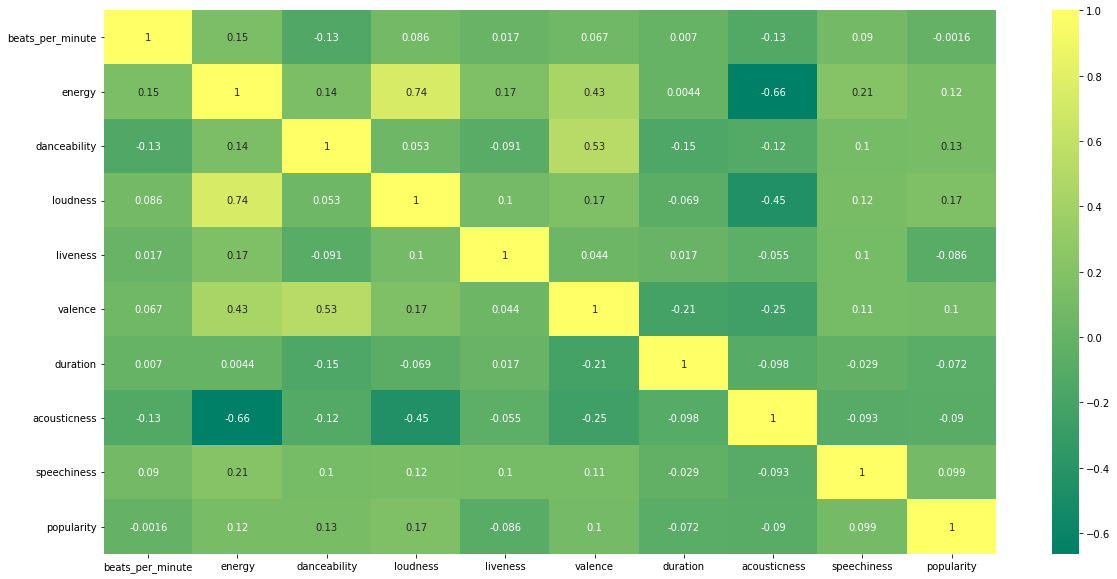

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(spotify_df.corr(),annot=True,cmap='summer')
plt.show()

### 3.3 Conclusión:

#### Característica objetivo: 'Popularidad'
Del mapa de calor anterior, aunque no muy extenso, podemos ver que las características más fuertes que se correlacionan con la popularidad son:
- sonoridad (17%)
- bailabilidad (13%)
- energía (12%)
- valencia (10%)

#### Relaciones de variables:
Podemos ver la relación más fuerte entre las variables excl. popularidad son:
- sonoridad y energía (74%)
- valencia y bailabilidad (53%)
- valencia y energía (43%)

# 4 DATOS DE MODELADO

##  Modelo (Clasificación de popularidad)

**Modelo predictor de popularidad:** buscará clasificar el nivel de popularidad de una canción en función de las métricas de características dadas, como se mencionó anteriormente.

**Pasos:**
1. Necesitamos una codificación en caliente (obtener variables ficticias) para la función de género, artista y popularidad para una mayor precisión.
2. Dividir y escalar datos
3. Datos del modelo y de entrenamiento

### Paso 1: Una codificación One hot-encode de género y artista:
#### - Crea variables ficticias para la columna de género.

In [23]:
# Función para crear variables ficticias

def dummies(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

spotify_df = dummies(spotify_df, 'genre', 'genre')
spotify_df = dummies(spotify_df, 'artist', 'artist')
spotify_df.head()

,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity,...,artist_Within Temptation,artist_Wolfmother,artist_Xavier Rudd,artist_Yann Tiersen,artist_Yes,artist_Youp van 't Hek,artist_Yusuf / Cat Stevens,artist_ZZ Top,artist_Zucchero,artist_a-ha
0,157,30,53,-14,11,68,201,94,3,71,...,0,0,0,0,0,0,0,0,0,0
1,135,79,50,-11,17,81,207,17,7,39,...,0,0,0,0,0,0,0,0,0,0
2,168,69,66,-9,7,52,341,2,17,69,...,0,0,0,0,0,0,0,0,0,0
3,173,96,43,-4,3,37,269,0,4,76,...,0,0,0,0,0,0,0,0,0,0
4,106,82,58,-5,10,87,256,1,3,59,...,0,0,0,0,0,0,0,0,0,0


#### - Clasifique la función de destino: 'popularidad' en contenedores 2x, para ayudar a clasificar mejor nuestros datos para nuestro modelo predictivo.

- 1 = 'más popular'
- 0 = 'menos popular'

In [24]:
spotify_df['popularity'] = pd.qcut(spotify_df['popularity'], q=2, labels=[0, 1]) 
spotify_df[['popularity']].head()

,popularity
0,1
1,0
2,1
3,1
4,0


In [25]:
target_v = spotify_df['popularity'].value_counts(normalize=True).round(3)
target_v

0    0.514
1    0.486
Name: popularity, dtype: float64

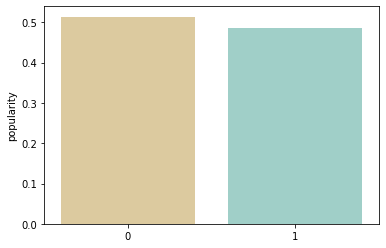

In [26]:
sns.barplot(x=target_v.index, y=target_v, palette="BrBG")

### Análisis

- Como vemos arriba, tenemos una muy buena división para nuestra variable objetivo. Esto minimizará en gran medida el desequilibrio de clases y permitirá que nuestro modelo sea más preciso.

### Step 2: Splitting & Scaling Data

In [27]:
# Elección de variables independientes y dependientes:

y = spotify_df.loc[:,'popularity'] #dependant 
X = spotify_df[['loudness', 'danceability', 'energy', 'valence']] #independant 

# Split data into training and test sets: 80% training, 20% test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [28]:
print('Tamaño de la Data:')
print('-')
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape,'y_test:', y_test.shape)

Tamaño de la Data:
-
X_train: (1382, 4) y_train: (1382,)
X_test: (346, 4) y_test: (346,)


In [29]:
# Scale the independant variable for relatively normal distribution of the data. 

X_train = StandardScaler().fit_transform(X_train)

## Modeling & Training

<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;"> Decision Tree</h1></center>

In [30]:
cross_valid_scores = {}

In [31]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],}

# El modelo sin el GridSearchCV
model_desicion_tree = DecisionTreeClassifier(
    random_state=123,
    class_weight='balanced',)

model_desicion_tree.fit(X_train, y_train)
print(model_desicion_tree.score(X_train, y_train))

0.9992764109985528
CPU times: user 8.13 ms, sys: 0 ns, total: 8.13 ms
Wall time: 9.19 ms


In [32]:
# Aplicar Hyperparametro GridSearchCV
model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Mejor Paramétro {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score del best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Mejor Paramétro {'max_depth': 9}
Mean cross-validated accuracy score del best_estimator: 0.561
-----


<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">Random Forest</h1></center>


In [33]:
%%time
SEED=123
parameters = {
    "n_estimators": [5, 10, 15, 100, 200], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=SEED,
    class_weight='balanced',)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'  )
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 5, 'n_estimators': 15}
Mean cross-validated accuracy score of the best_estimator: 0.577
-----
CPU times: user 22.7 s, sys: 128 ms, total: 22.9 s
Wall time: 22.8 s


<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">AdaBoost</h1></center>

In [34]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

model_adaboost = AdaBoostClassifier(
    random_state=SEED,)

model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',)

model_adaboost.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_adaboost.best_score_:.3f}')
cross_valid_scores['ada_boost'] = model_adaboost.best_score_
print('-----')

-----
Best parameters {'learning_rate': 1.0, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.557
-----
CPU times: user 13 s, sys: 65.3 ms, total: 13.1 s
Wall time: 13.1 s


<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">XGBoost</h1></center>

In [35]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1] }

model_xgb = xgb.XGBClassifier(
    random_state=SEED,)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',)

model_xgb.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')

-----
Best parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 15}
Mean cross-validated accuracy score of the best_estimator: 0.576
-----
CPU times: user 14.8 s, sys: 223 ms, total: 15.1 s
Wall time: 15 s


<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">Regresión Logística</h1></center>


In [36]:
%%time
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=SEED,
    class_weight="balanced", solver="liblinear",)

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='accuracy',)

model_logistic_regression.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logistic_regression.best_score_:.3f}')
cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')

-----
Best parameters {'C': 0.1, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.557
-----
CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 135 ms


<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;"> SVC</h1></center>

In [ ]:
df.sample(frac=0.6)

In [ ]:
%%time
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

model_svc = SVC(
    random_state=SEED,
    class_weight="balanced", probability=True,)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5, scoring='accuracy',)

model_svc.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
print('-----')

<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">K-Nearest Neighbors</h1></center>

In [1]:
%%time
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

model_k_neighbors = KNeighborsClassifier()

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    params, 
    cv=5,
    scoring='accuracy',)

model_k_neighbors.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

NameError: ignored

<center><h1 style="font-size:230%; font-family:cursive; background:lime; color:black; border-radius:10px 10px; padding:10px;">Comparación de Resultados de GridSearchCV</h1></center>


In [37]:
models=pd.DataFrame(cross_valid_scores, index=['cross_valid_score']).T
models

,cross_valid_score
desicion_tree,0.560762
random_forest,0.577471
ada_boost,0.557178
xgboost,0.576022
logistic_regression,0.557207


## Salidas de Accuracy del modelo de entrenamiento:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, linear_model, tree 
# Creando Modelo

logr_model = linear_model.LogisticRegression(solver='liblinear')
dtree_model = tree.DecisionTreeClassifier()
nb_model = GaussianNB()

# Entrenando los modelos

logr_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Accuracy de con los Datos de entrenamiento

logr_train_acc = logr_model.score(X_train, y_train)
dtree_train_acc = dtree_model.score(X_train, y_train)
nb_train_acc = nb_model.score(X_train, y_train)

print('Training Model Accuracy Outputs:')
print('-')
print('Logistic Regression:', round(logr_train_acc*100,2),'%')
print('Decision Tree:', round(dtree_train_acc*100,2),'%')
print('Naive Bayes:', round(nb_train_acc*100,2),'%')

Training Model Accuracy Outputs:
-
Logistic Regression: 56.8 %
Decision Tree: 99.93 %
Naive Bayes: 55.64 %


In [39]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc, dtree_train_acc, nb_train_acc], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with training data')
fig.show()

### Análisis:
- Como se ve arriba, parece que el modelo de árbol de decisiones tiene una tasa de precisión realmente alta en comparación con los datos de entrenamiento. Pero esto parece un poco demasiado alto y sospecho que se ajusta demasiado. Validaré esto a través de la validación cruzada k-fold.

## Validating models with k-fold cross validation:

In [40]:
# Validating models with k-fold cross validation method

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=24)

accuracy_logr = cross_val_score(logr_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_dtree = cross_val_score(dtree_model, X_train, y_train, scoring="accuracy", cv=kf)
accuracy_nb = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=kf)

accuracy_logr = accuracy_logr.mean()
accuracy_dtree = accuracy_dtree.mean()
accuracy_nb = accuracy_nb.mean()

print('k-fold Cross Validation Accuracy Outputs:')
print('-')
print("Logistic Regression:", round(accuracy_logr*100,2),"%")
print("Decision Tree:", round(accuracy_dtree*100,2),"%")
print("Naive Bayes:", round(accuracy_nb*100,2),"%")

k-fold Cross Validation Accuracy Outputs:
-
Logistic Regression: 56.67 %
Decision Tree: 54.35 %
Naive Bayes: 55.65 %


In [41]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr, accuracy_dtree, accuracy_nb], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating models with k-fold cross validation')
fig.show()

### Análisis:
- Como se vio anteriormente, esto parece un poco más preciso, siendo la mejor Accuracy el modelo de regresión logística. Parecería que con un conjunto de datos más grande, el Árbol de decisiones funciona bien, pero cuando hay datos mínimos, no tanto.

## Test Data Output from trained models:

In [ ]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs:')
print('-')
print('Logistic Regression:', round(logr_model.score(X_test, y_test)*100,2),'%')
print('Decision Tree:', round(dtree_model.score(X_test, y_test)*100,2),'%')
print('Naive Bayes:', round(nb_model.score(X_test, y_test)*100,2),'%')

Test data - Model Accuracy Outputs:
-
Logistic Regression: 53.47 %
Decision Tree: 53.47 %
Naive Bayes: 53.18 %


### Análisis y próximos pasos:
- Con los datos de prueba, tenemos una coincidencia idéntica con Regresión logística y Árbol de decisiones.
- Los índices de Accuracy son muy bajos.
- Buscaré incluir ahora todas las variables para ayudar a mejorar la precisión de los modelos.

# --> Model (Popularity Classification) Pt.2 

- Using all independant variables to try and achieve a greater accuracy

### Splitting & Scaling Data.2

In [ ]:
# Chosing independant and dependant variables:

y_1 = spotify_df.loc[:,'popularity'] #dependant/target 
X_1 = spotify_df.drop('popularity', axis=1)#independant 

# Split data into training and test sets: 80% training, 20% test split.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=20)

In [ ]:
print('Shape of Data.2:')
print('-')
print('X_train_1:', X_train_1.shape, 'y_train_1:', y_train_1.shape)
print('X_test_1:',X_test_1.shape,'y_test_1:', y_test_1.shape)

Shape of Data.2:
-
X_train_1: (1382, 603) y_train_1: (1382,)
X_test_1: (346, 603) y_test_1: (346,)


In [ ]:
# Scale the independant variable for relatively normal distribution of the data. 

X_train_1 = StandardScaler().fit_transform(X_train_1)

## Modeling & Training.2

- Same a previosuly done with the 3x classification models.

#### Training Model Accuracy Outputs.2

In [ ]:
# Creating Models

logr_model_1 = linear_model.LogisticRegression(solver='liblinear')
dtree_model_1 = tree.DecisionTreeClassifier()
nb_model_1 = GaussianNB()

# Training the models

logr_model_1.fit(X_train_1, y_train_1)
dtree_model_1.fit(X_train_1, y_train_1)
nb_model_1.fit(X_train_1, y_train_1)

# Accuracy of trained models with training data:

logr_train_acc_1 = logr_model_1.score(X_train_1, y_train_1)
dtree_train_acc_1 = dtree_model_1.score(X_train_1, y_train_1)
nb_train_acc_1 = nb_model_1.score(X_train_1, y_train_1)

print('Training Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_train_acc_1*100,2),'%')
print('Decision Tree:', round(dtree_train_acc_1*100,2),'%')
print('Naive Bayes:', round(nb_train_acc_1*100,2),'%')

Training Model Accuracy Outputs.2:
-
Logistic Regression: 85.53 %
Decision Tree: 100.0 %
Naive Bayes: 77.71 %


In [ ]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[logr_train_acc_1, dtree_train_acc_1, nb_train_acc_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with tusing all independant variables on training data')
fig.show()

### Analysis:
- As seen above it appears that the accuracy has increased quite a bit for all models, again, Decision Tree Model has a really high accuracy rate against the training data. So will validate this through k-fold cross validation.

#### Validating models with k-fold cross validation.2

In [ ]:
# Validating new models with k-fold cross validation method

accuracy_logr_1 = cross_val_score(logr_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_dtree_1 = cross_val_score(dtree_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)
accuracy_nb_1 = cross_val_score(nb_model_1, X_train_1, y_train_1, scoring="accuracy", cv=kf)

accuracy_logr_1 = accuracy_logr_1.mean()
accuracy_dtree_1 = accuracy_dtree_1.mean()
accuracy_nb_1 = accuracy_nb_1.mean()

print('k-fold Cross Validation Accuracy Outputs.2:')
print('-')
print("Logistic Regression:", round(accuracy_logr_1*100,2),"%")
print("Decision Tree:", round(accuracy_dtree_1*100,2),"%")
print("Naive Bayes:", round(accuracy_nb_1*100,2),"%")

k-fold Cross Validation Accuracy Outputs.2:
-
Logistic Regression: 69.46 %
Decision Tree: 61.79 %
Naive Bayes: 63.81 %


In [ ]:
fig = px.bar(x=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'], 
             y=[accuracy_logr_1, accuracy_dtree_1, accuracy_nb_1], 
            color=['Logistic Regression', 'Decision Tree model', 'Naive Bayes'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Validating new models with k-fold cross validation')
fig.show()

### Analysis:
- With the increase in data for the feature variables, we have increased validation of the models, with logistic regression coming out on top and decision trees coming in as least favourable.

#### Test Data Output from trained models.2

In [ ]:
# using the test data for our trained models:

print('Test data - Model Accuracy Outputs.2:')
print('-')
print('Logistic Regression:', round(logr_model_1.score(X_test_1, y_test_1)*100,2))
print('Decision Tree:', round(dtree_model_1.score(X_test_1, y_test_1)*100,2))
print('Naive Bayes:', round(nb_model_1.score(X_test_1, y_test_1)*100,2))

Test data - Model Accuracy Outputs.2:
-
Logistic Regression: 55.49
Decision Tree: 50.0
Naive Bayes: 62.14


## Summary of Model Accuracy:

#### Model (Popularity Classification) 
- With 'loudness', 'danceability', 'energy', 'valence' as independant variables due to highest correlation.

Trained Model:
- LR Accuracy: 56%
- DT Accuracy: 99%
- NB Accuracy: 55%

K-fold Cross Val:
- LR Accuracy: 56%
- DT Accuracy: 54%
- NB Accuracy: 55%

Test Data Result:
- LR Accuracy: 53%
- DT Accuracy: 53%
- NB Accuracy: 53%


#### Model (Popularity Classification) pt.2
- With all independant data variables included.

Trained Model.2:
- LR Accuracy: 85%
- DT Accuracy: 100%
- NB Accuracy: 77%

K-fold Cross Val.2:
- LR Accuracy: 69%
- DT Accuracy: 62%
- NB Accuracy: 63%

Test Data Result.2:
- LR Accuracy: 55%
- DT Accuracy: 50%
- NB Accuracy: 62%

# 5 FINAL CONCLUSIONS

1. The accuracy of the data sets are quite vaired throughout the models used.
2. Overall, it seems the models perform better with more data than less. My assumption is this is due to the lack of strong correlation between what makes a song popular. As well as a shift in music trends over the years which makes prediction more challenging. In retrospect I could have split the modeling over the year blocks created. This may produce a more accurate model and relevant model.
3. In conclusion, the best performing in general, either the **Linear Regression** should be used with a larger dataset (+1000) with an 85% accuracy . And **Naive Bayes** models should be used with a smaller data set with a 62% accuracy.